## import libraries

In [1]:
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
import numpy as np
import gc
from tqdm import tqdm


pd.options.display.max_columns=200
pd.options.display.max_rows=100


## ingest data

In [2]:
data_files = os.listdir('data')

In [3]:
games_df = pd.read_csv('./data/games.csv') # this file contains the schedule of games
scouting_data = pd.read_csv('./data/pffScoutingData.csv') # this file contains player roles relative to each play
players = pd.read_csv('./data/players.csv') # this file contains player descriptions
plays = pd.read_csv('./data/plays.csv') # this file tells us about each play in each game
nfl_birthdays = pd.read_csv('./data/NFLBirthdays.csv')
weeks_df = pd.read_csv('./data/week1.csv') # this file contains player tracking data

for file_name in data_files:
    
    if 'week' in file_name and file_name != 'week1.csv':
    
        d = pd.read_csv(f"./data/{file_name}", engine='python', error_bad_lines=False)

        weeks_df = pd.concat([d,weeks_df])



/var/folders/s7/3dcc3pkd0kb7tgrb1sc5zlzh0000gn/T/ipykernel_5648/1700909943.py:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  d = pd.read_csv(f"./data/{file_name}", engine='python', error_bad_lines=False)
/var/folders/s7/3dcc3pkd0kb7tgrb1sc5zlzh0000gn/T/ipykernel_5648/1700909943.py:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  d = pd.read_csv(f"./data/{file_name}", engine='python', error_bad_lines=False)
Skipping line 1093237: unexpected end of data
/var/folders/s7/3dcc3pkd0kb7tgrb1sc5zlzh0000gn/T/ipykernel_5648/1700909943.py:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  d = pd.read_csv(f"./data/{file_name}", engine='python', error_bad_lines=False)
Skipping line 744197: unexpected end of data
/va

In [4]:
weeks_and_plays = weeks_df.merge(plays, on=['gameId', 'playId'])
weeks_and_plays

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021102800,189,37077.0,1,2021-10-29T00:27:23.000,18.0,ARI,right,21.38,6.94,0.00,0.00,0.00,43.74,223.19,None,(12:58) (Shotgun) K.Murray sacked at ARI 2 for...,1,1,10,ARI,GB,ARI,13,12:58,0,0,S,15.0,-11,15,Face Mask (15 Yards),47795.0,NaN,NaN,NaN,NaN,23.0,EMPTY,"1 RB, 1 TE, 3 WR",5.0,"2 DL, 4 LB, 5 DB",NaN,0,Quarters,Zone
1,2021102800,189,37077.0,2,2021-10-29T00:27:23.100,18.0,ARI,right,21.38,6.94,0.00,0.00,0.00,44.67,243.81,None,(12:58) (Shotgun) K.Murray sacked at ARI 2 for...,1,1,10,ARI,GB,ARI,13,12:58,0,0,S,15.0,-11,15,Face Mask (15 Yards),47795.0,NaN,NaN,NaN,NaN,23.0,EMPTY,"1 RB, 1 TE, 3 WR",5.0,"2 DL, 4 LB, 5 DB",NaN,0,Quarters,Zone
2,2021102800,189,37077.0,3,2021-10-29T00:27:23.200,18.0,ARI,right,21.38,6.95,0.00,0.00,0.00,45.69,303.24,None,(12:58) (Shotgun) K.Murray sacked at ARI 2 for...,1,1,10,ARI,GB,ARI,13,12:58,0,0,S,15.0,-11,15,Face Mask (15 Yards),47795.0,NaN,NaN,NaN,NaN,23.0,EMPTY,"1 RB, 1 TE, 3 WR",5.0,"2 DL, 4 LB, 5 DB",NaN,0,Quarters,Zone
3,2021102800,189,37077.0,4,2021-10-29T00:27:23.300,18.0,ARI,right,21.38,6.94,0.00,0.00,0.00,46.44,285.89,None,(12:58) (Shotgun) K.Murray sacked at ARI 2 for...,1,1,10,ARI,GB,ARI,13,12:58,0,0,S,15.0,-11,15,Face Mask (15 Yards),47795.0,NaN,NaN,NaN,NaN,23.0,EMPTY,"1 RB, 1 TE, 3 WR",5.0,"2 DL, 4 LB, 5 DB",NaN,0,Quarters,Zone
4,2021102800,189,37077.0,5,2021-10-29T00:27:23.400,18.0,ARI,right,21.38,6.95,0.00,0.00,0.01,47.99,341.60,None,(12:58) (Shotgun) K.Murray sacked at ARI 2 for...,1,1,10,ARI,GB,ARI,13,12:58,0,0,S,15.0,-11,15,Face Mask (15 Yards),47795.0,NaN,NaN,NaN,NaN,23.0,EMPTY,"1 RB, 1 TE, 3 WR",5.0,"2 DL, 4 LB, 5 DB",NaN,0,Quarters,Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7293780,2021091300,4845,NaN,30,2021-09-14T03:54:20.600,NaN,football,left,52.78,25.23,3.58,1.95,0.37,NaN,NaN,pass_forward,(3:44) (Shotgun) D.Carr pass deep right to Z.J...,5,2,14,LV,BAL,BAL,31,03:44,27,27,C,NaN,31,31,NaN,NaN,NaN,NaN,NaN,NaN,41.0,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,0,Cover-0,Man
7293781,2021091300,4845,NaN,31,2021-09-14T03:54:20.700,NaN,football,left,50.31,26.46,17.16,0.25,2.77,NaN,NaN,None,(3:44) (Shotgun) D.Carr pass deep right to Z.J...,5,2,14,LV,BAL,BAL,31,03:44,27,27,C,NaN,31,31,NaN,NaN,NaN,NaN,NaN,NaN,41.0,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,0,Cover-0,Man
7293782,2021091300,4845,NaN,32,2021-09-14T03:54:20.800,NaN,football,left,48.66,26.99,17.10,1.05,1.73,NaN,NaN,None,(3:44) (Shotgun) D.Carr pass deep right to Z.J...,5,2,14,LV,BAL,BAL,31,03:44,27,27,C,NaN,31,31,NaN,NaN,NaN,NaN,NaN,NaN,41.0,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,0,Cover-0,Man
7293783,2021091300,4845,NaN,33,2021-09-14T03:54:20.900,NaN,football,left,47.04,27.53,16.98,1.67,1.71,NaN,NaN,None,(3:44) (Shotgun) D.Carr pass deep right to Z.J...,5,2,14,LV,BAL,BAL,31,03:44,27,27,C,NaN,31,31,NaN,NaN,NaN,NaN,NaN,NaN,41.0,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,0,Cover-0,Man


In [5]:
weeks_and_plays.time = pd.to_datetime(weeks_and_plays.time)

In [6]:
min_times = pd.Series(weeks_and_plays[weeks_and_plays.event.isin(["ball_snap","autoevent_ballsnap"])].groupby(['gameId', 'playId'])['time'].min(), name='play_min_time')

max_times = pd.Series(weeks_and_plays.groupby(['gameId', 'playId'])['time'].max(), name='play_max_time')


In [7]:
time_diff = pd.Series((max_times-min_times).dt.total_seconds(), name='ball_snap_to_play_end')
weeks_and_plays = weeks_and_plays.merge(time_diff, on=['gameId', 'playId'])

## Using snap x position as yardline instead of yardlineNumber
- yardline number only goes up to 50 and starts over depending on play direction 

In [8]:
# doesn't matter if we take min/max/first/last, they're all the same.
snap_yard_line = pd.Series(weeks_and_plays[weeks_and_plays.event.isin(["ball_snap","autoevent_ballsnap"])].groupby(['gameId', 'playId'])['x'].mean(), name='snap_yard_line')
snap_yard_line


gameId      playId
2021090900  97         43.077391
            137       107.036522
            187        75.443913
            282        48.004348
            349        53.445000
                         ...    
2021103110  1459       61.961304
            1500       42.937826
            1524       23.921522
            1580       36.247174
            1604       38.504545
Name: snap_yard_line, Length: 7499, dtype: float64

In [9]:
pass_events = weeks_and_plays[weeks_and_plays.event.isin(["pass_forward", "autoevent_passforward"])]
final_x_y = pass_events.sort_values(['gameId', 'playId', 'nflId','time']).groupby(['gameId', 'playId', 'nflId','playDirection', 'team'])[['x','y']].last().reset_index(drop=False)
final_x_y

,gameId,playId,nflId,playDirection,team,x,y
0,2021090900,97,25511.0,right,TB,32.69,20.50
1,2021090900,97,35481.0,right,TB,46.88,44.67
2,2021090900,97,35634.0,right,TB,54.72,41.19
3,2021090900,97,39985.0,right,TB,37.69,15.17
4,2021090900,97,40151.0,right,TB,36.31,21.42
...,...,...,...,...,...,...,...
146864,2021103110,1604,42393.0,right,DEN,45.37,40.99
146865,2021103110,1604,42794.0,right,WAS,49.06,14.67
146866,2021103110,1604,42831.0,right,WAS,26.48,29.54
146867,2021103110,1604,42935.0,right,DEN,43.06,17.80


In [10]:
final_x_y = final_x_y.merge(snap_yard_line.astype(int), on=['gameId', 'playId'])
final_x_y

,gameId,playId,nflId,playDirection,team,x,y,snap_yard_line
0,2021090900,97,25511.0,right,TB,32.69,20.50,43
1,2021090900,97,35481.0,right,TB,46.88,44.67,43
2,2021090900,97,35634.0,right,TB,54.72,41.19,43
3,2021090900,97,39985.0,right,TB,37.69,15.17,43
4,2021090900,97,40151.0,right,TB,36.31,21.42,43
...,...,...,...,...,...,...,...,...
146446,2021103110,1604,42393.0,right,DEN,45.37,40.99,38
146447,2021103110,1604,42794.0,right,WAS,49.06,14.67,38
146448,2021103110,1604,42831.0,right,WAS,26.48,29.54,38
146449,2021103110,1604,42935.0,right,DEN,43.06,17.80,38


In [11]:
unique_plays = final_x_y[['gameId', 'playId']].drop_duplicates()

## Plot where players are at the end of a play (this is what we are going to try and predict)

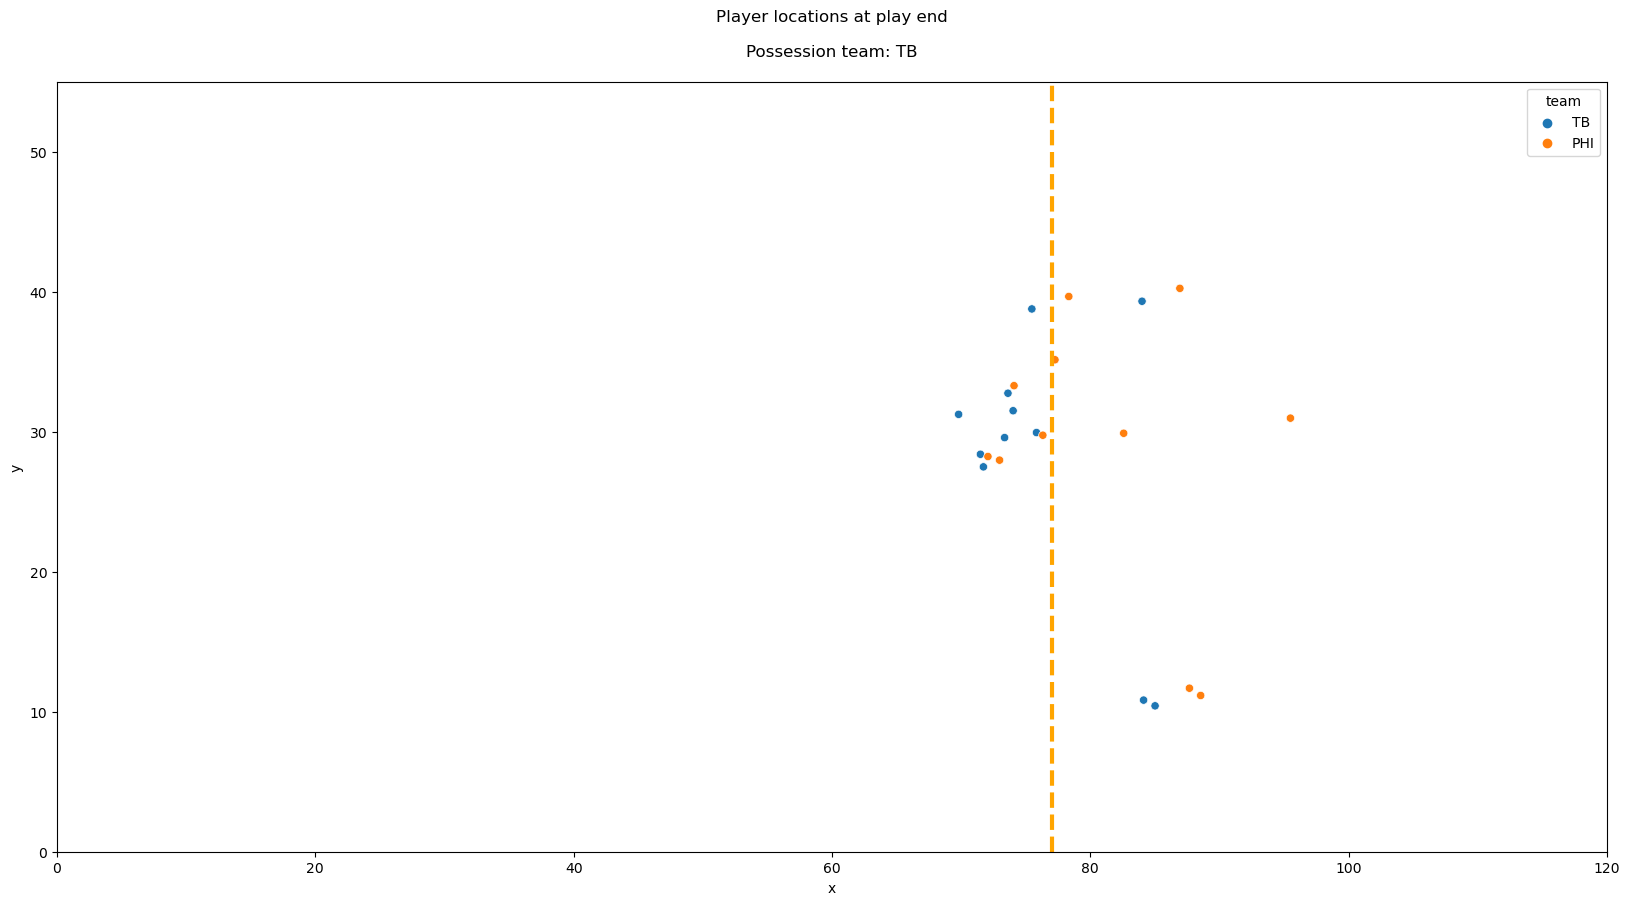

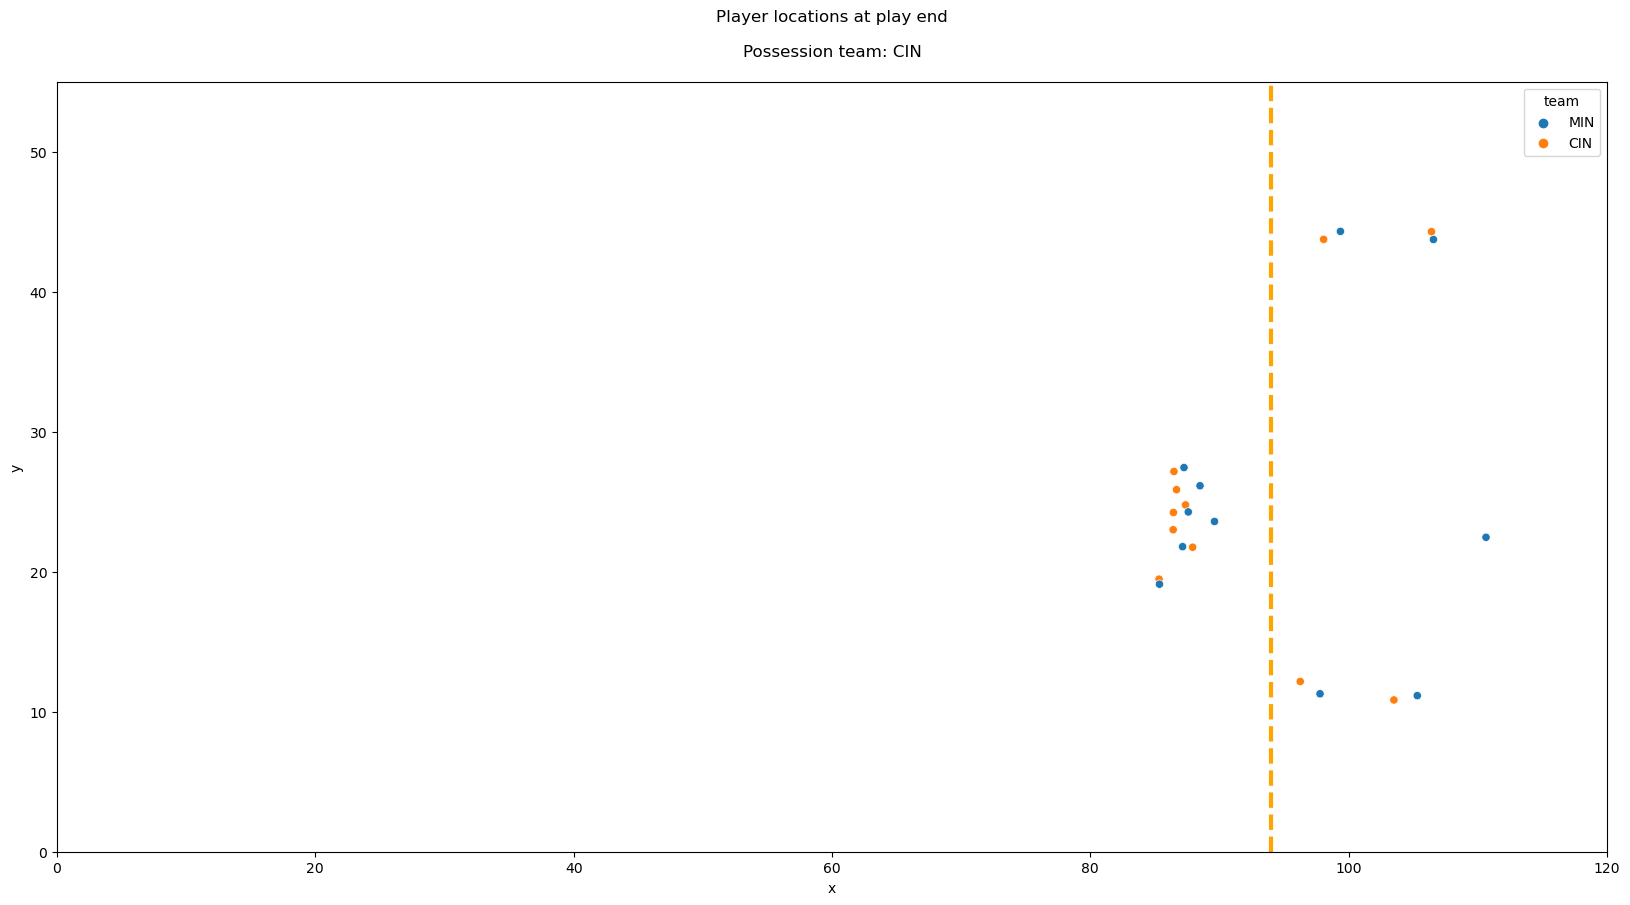

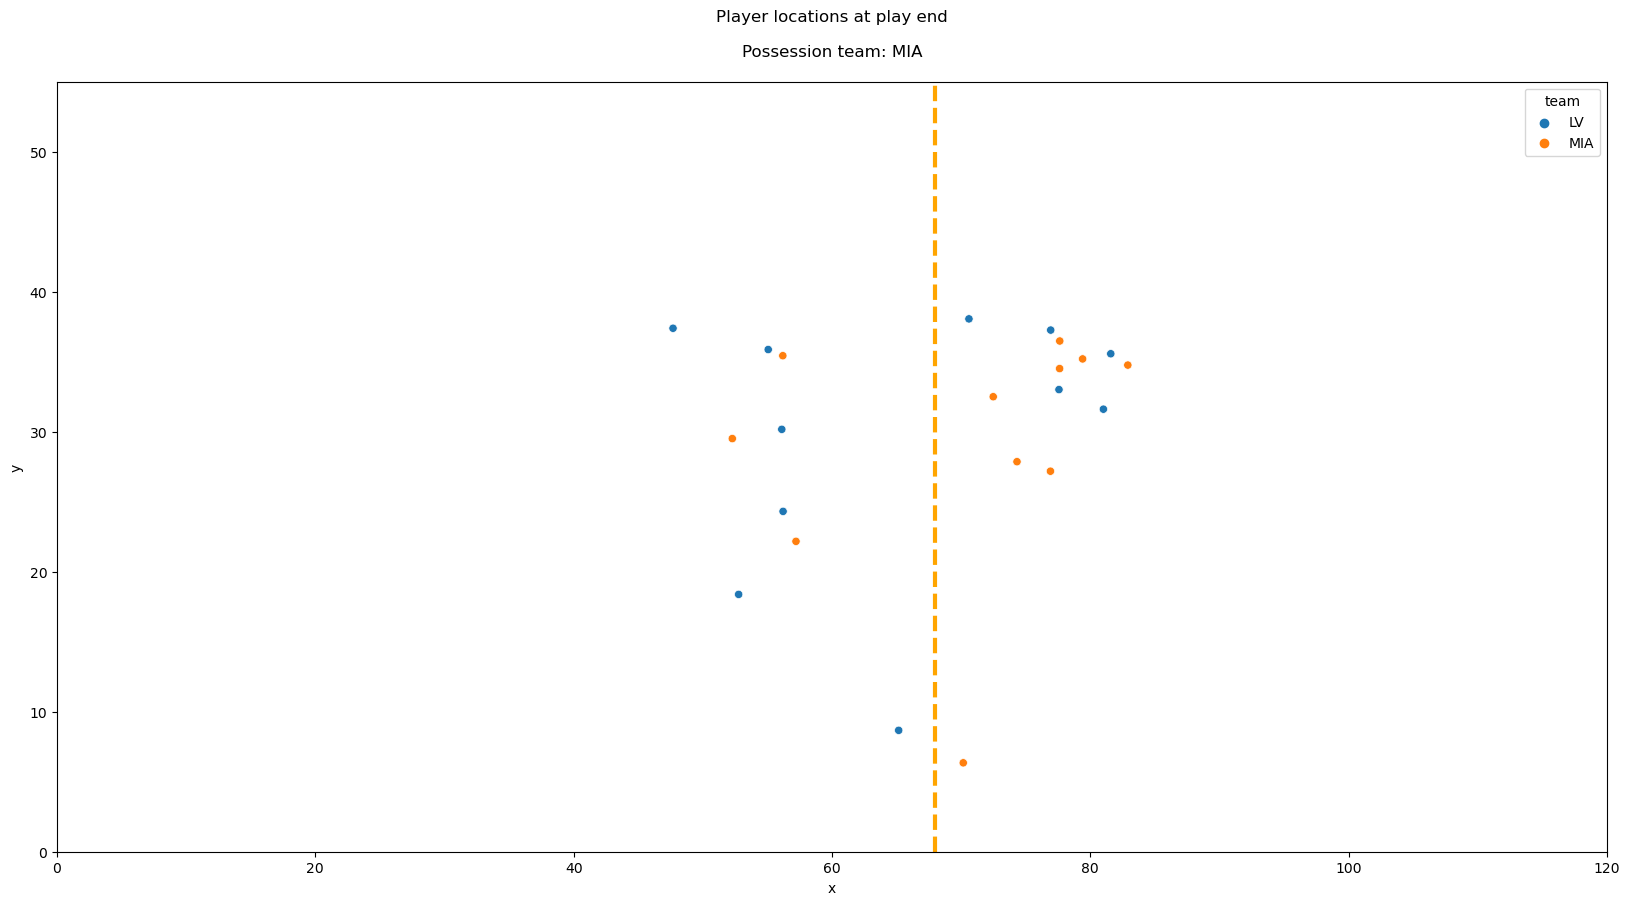

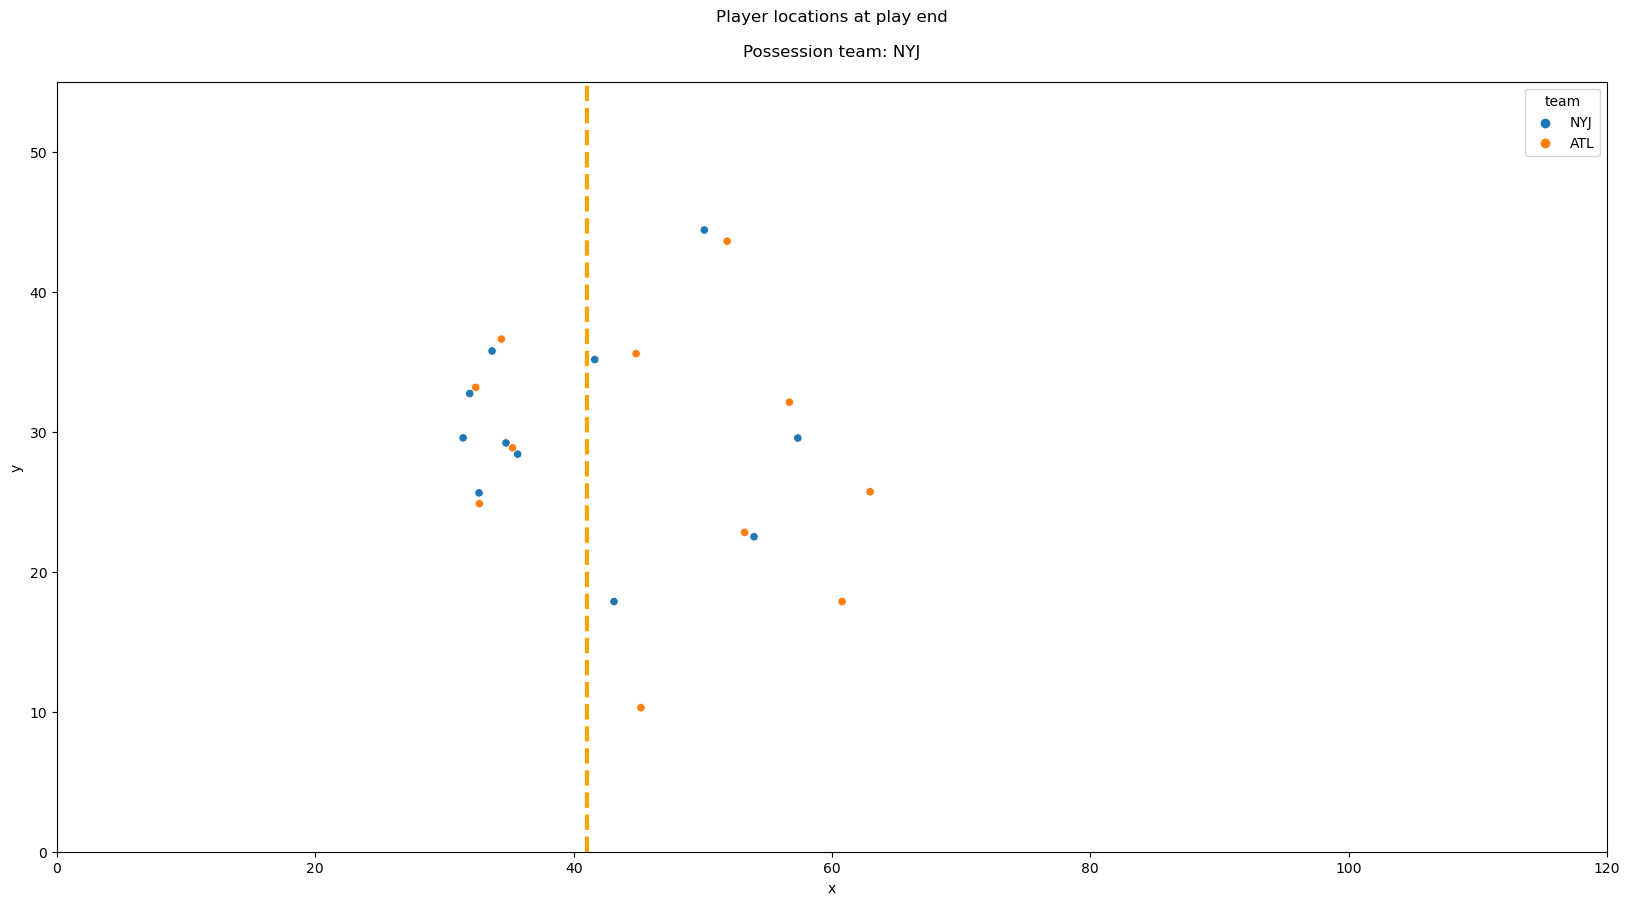

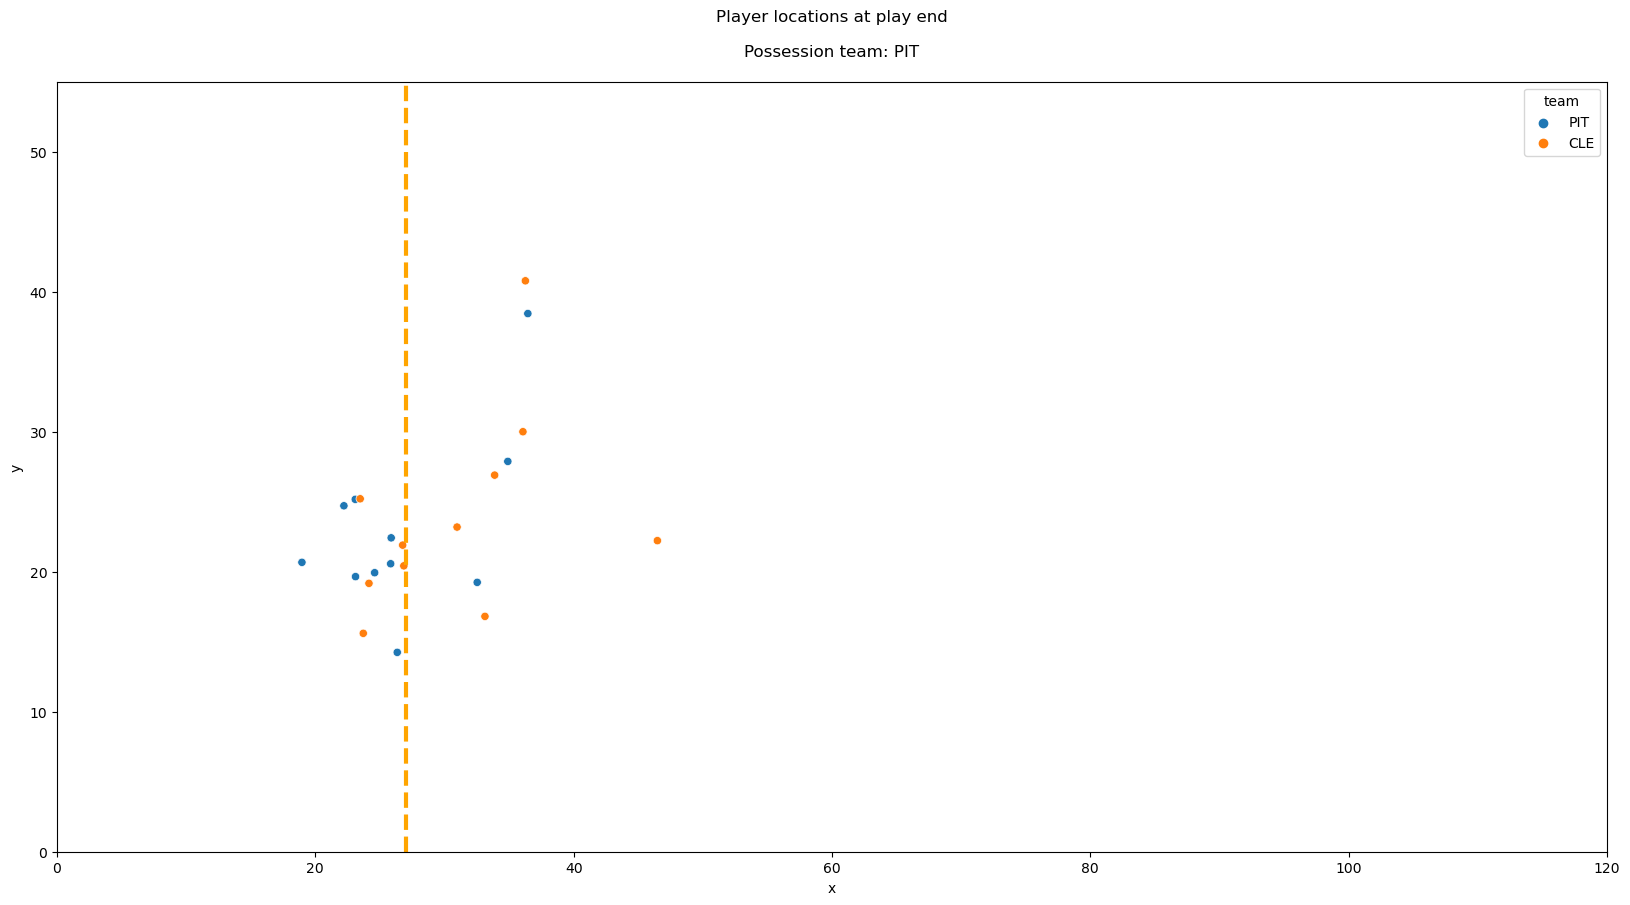

In [12]:
for rand_int in np.random.randint(0, unique_plays.shape[0], 5):

    
    game_id = unique_plays.iloc[rand_int].gameId
    play_id = unique_plays.iloc[rand_int].playId
    
    data = final_x_y.loc[(final_x_y.gameId==game_id) &(final_x_y.playId==play_id), ['snap_yard_line','team','x','y']]
    
    plt.figure(figsize=(20,10))
    
    pos_team = plays[(plays.gameId==game_id) & (plays.playId==play_id)].possessionTeam.values[0]
    
    plt.title(f"Player locations at play end\n\nPossession team: {pos_team}\n")
    sns.scatterplot(x='x', y='y', data=data, hue='team')
    plt.xlim([0,120])
    plt.ylim([0,55])
    
    plt.axvline(data.snap_yard_line.mean(), color='orange', linestyle='dashed', linewidth=3)

    plt.show()

## Find and plot what players are marked

In [13]:
weeks_and_games_df = pd.merge(weeks_df, games_df, on='gameId')
weeks_and_games_df

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021102800,189,37077.0,1,2021-10-29T00:27:23.000,18.0,ARI,right,21.38,6.94,0.00,0.00,0.00,43.74,223.19,None,2021,8,10/28/2021,20:20:00,ARI,GB
1,2021102800,189,37077.0,2,2021-10-29T00:27:23.100,18.0,ARI,right,21.38,6.94,0.00,0.00,0.00,44.67,243.81,None,2021,8,10/28/2021,20:20:00,ARI,GB
2,2021102800,189,37077.0,3,2021-10-29T00:27:23.200,18.0,ARI,right,21.38,6.95,0.00,0.00,0.00,45.69,303.24,None,2021,8,10/28/2021,20:20:00,ARI,GB
3,2021102800,189,37077.0,4,2021-10-29T00:27:23.300,18.0,ARI,right,21.38,6.94,0.00,0.00,0.00,46.44,285.89,None,2021,8,10/28/2021,20:20:00,ARI,GB
4,2021102800,189,37077.0,5,2021-10-29T00:27:23.400,18.0,ARI,right,21.38,6.95,0.00,0.00,0.01,47.99,341.60,None,2021,8,10/28/2021,20:20:00,ARI,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7293780,2021091300,4845,NaN,30,2021-09-14T03:54:20.600,NaN,football,left,52.78,25.23,3.58,1.95,0.37,NaN,NaN,pass_forward,2021,1,09/13/2021,20:15:00,LV,BAL
7293781,2021091300,4845,NaN,31,2021-09-14T03:54:20.700,NaN,football,left,50.31,26.46,17.16,0.25,2.77,NaN,NaN,None,2021,1,09/13/2021,20:15:00,LV,BAL
7293782,2021091300,4845,NaN,32,2021-09-14T03:54:20.800,NaN,football,left,48.66,26.99,17.10,1.05,1.73,NaN,NaN,None,2021,1,09/13/2021,20:15:00,LV,BAL
7293783,2021091300,4845,NaN,33,2021-09-14T03:54:20.900,NaN,football,left,47.04,27.53,16.98,1.67,1.71,NaN,NaN,None,2021,1,09/13/2021,20:15:00,LV,BAL


In [14]:
home_team_df = weeks_and_games_df[(weeks_and_games_df.team==weeks_and_games_df.homeTeamAbbr)]
visitor_team_df = weeks_and_games_df[(weeks_and_games_df.team==weeks_and_games_df.visitorTeamAbbr)]

print(home_team_df.shape, visitor_team_df.shape)

del weeks_and_games_df
gc.collect()

(3488384, 22) (3488390, 22)


18173

In [15]:
df_wide = pd.merge(home_team_df, visitor_team_df, on=['gameId','playId', 'frameId','time', 'gameDate', 'gameTimeEastern','homeTeamAbbr', 'visitorTeamAbbr', 'playDirection', 'week', 'season'], suffixes=('_home_team', '_visitor_team'))

del home_team_df, visitor_team_df
gc.collect()

df_wide


,gameId,playId,nflId_home_team,frameId,time,jerseyNumber_home_team,team_home_team,playDirection,x_home_team,y_home_team,s_home_team,a_home_team,dis_home_team,o_home_team,dir_home_team,event_home_team,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,nflId_visitor_team,jerseyNumber_visitor_team,team_visitor_team,x_visitor_team,y_visitor_team,s_visitor_team,a_visitor_team,dis_visitor_team,o_visitor_team,dir_visitor_team,event_visitor_team
0,2021102800,189,37077.0,1,2021-10-29T00:27:23.000,18.0,ARI,right,21.38,6.94,0.00,0.00,0.00,43.74,223.19,None,2021,8,10/28/2021,20:20:00,ARI,GB,42381.0,91.0,GB,23.22,29.79,0.01,0.01,0.01,181.97,228.24,None
1,2021102800,189,37077.0,1,2021-10-29T00:27:23.000,18.0,ARI,right,21.38,6.94,0.00,0.00,0.00,43.74,223.19,None,2021,8,10/28/2021,20:20:00,ARI,GB,42485.0,31.0,GB,35.14,16.48,0.89,0.33,0.09,266.92,114.76,None
2,2021102800,189,37077.0,1,2021-10-29T00:27:23.000,18.0,ARI,right,21.38,6.94,0.00,0.00,0.00,43.74,223.19,None,2021,8,10/28/2021,20:20:00,ARI,GB,43316.0,97.0,GB,23.45,26.46,0.03,0.02,0.02,292.70,110.88,None
3,2021102800,189,37077.0,1,2021-10-29T00:27:23.000,18.0,ARI,right,21.38,6.94,0.00,0.00,0.00,43.74,223.19,None,2021,8,10/28/2021,20:20:00,ARI,GB,43404.0,59.0,GB,25.79,17.22,0.50,0.69,0.05,287.19,220.46,None
4,2021102800,189,37077.0,1,2021-10-29T00:27:23.000,18.0,ARI,right,21.38,6.94,0.00,0.00,0.00,43.74,223.19,None,2021,8,10/28/2021,20:20:00,ARI,GB,43426.0,94.0,GB,23.52,21.36,0.04,0.16,0.01,254.80,357.55,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38365765,2021091300,4845,53446.0,34,2021-09-14T03:54:21.000,70.0,LV,left,44.76,23.25,2.26,1.66,0.23,160.20,142.70,None,2021,1,09/13/2021,20:15:00,LV,BAL,46259.0,32.0,BAL,52.48,26.80,5.27,2.92,0.54,309.70,97.75,None
38365766,2021091300,4845,53446.0,34,2021-09-14T03:54:21.000,70.0,LV,left,44.76,23.25,2.26,1.66,0.23,160.20,142.70,None,2021,1,09/13/2021,20:15:00,LV,BAL,48565.0,30.0,BAL,30.48,15.33,6.82,1.05,0.68,247.08,263.22,None
38365767,2021091300,4845,53446.0,34,2021-09-14T03:54:21.000,70.0,LV,left,44.76,23.25,2.26,1.66,0.23,160.20,142.70,None,2021,1,09/13/2021,20:15:00,LV,BAL,52436.0,6.0,BAL,44.97,27.34,3.74,2.10,0.38,48.34,77.30,None
38365768,2021091300,4845,53446.0,34,2021-09-14T03:54:21.000,70.0,LV,left,44.76,23.25,2.26,1.66,0.23,160.20,142.70,None,2021,1,09/13/2021,20:15:00,LV,BAL,52506.0,40.0,BAL,50.39,22.05,5.70,3.41,0.58,27.13,44.89,None


In [16]:
close_df = df_wide[(np.isclose(df_wide.x_home_team, df_wide.x_visitor_team, atol=1.5)) & np.isclose(df_wide.y_home_team, df_wide.y_visitor_team, atol=1)]
close_df.time = pd.to_datetime(close_df.time)
close_df = close_df.sort_values('time')

del df_wide 
gc.collect()

close_df

/var/folders/s7/3dcc3pkd0kb7tgrb1sc5zlzh0000gn/T/ipykernel_5648/2298876315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_df.time = pd.to_datetime(close_df.time)


,gameId,playId,nflId_home_team,frameId,time,jerseyNumber_home_team,team_home_team,playDirection,x_home_team,y_home_team,s_home_team,a_home_team,dis_home_team,o_home_team,dir_home_team,event_home_team,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,nflId_visitor_team,jerseyNumber_visitor_team,team_visitor_team,x_visitor_team,y_visitor_team,s_visitor_team,a_visitor_team,dis_visitor_team,o_visitor_team,dir_visitor_team,event_visitor_team
32483539,2021090900,97,41233.0,1,2021-09-10 00:26:31.100,13.0,TB,right,42.01,16.19,0.00,0.00,0.00,131.20,232.25,None,2021,1,09/09/2021,20:20:00,TB,DAL,52459.0,7.0,DAL,43.50,16.27,0.80,0.57,0.08,311.97,202.95,None
32483660,2021090900,97,41233.0,2,2021-09-10 00:26:31.200,13.0,TB,right,42.02,16.19,0.00,0.00,0.00,130.21,38.98,None,2021,1,09/09/2021,20:20:00,TB,DAL,52459.0,7.0,DAL,43.47,16.19,0.82,0.30,0.08,303.41,202.41,None
32483781,2021090900,97,41233.0,3,2021-09-10 00:26:31.300,13.0,TB,right,42.01,16.19,0.00,0.00,0.00,130.21,325.39,None,2021,1,09/09/2021,20:20:00,TB,DAL,52459.0,7.0,DAL,43.44,16.13,0.79,0.14,0.08,298.81,204.33,None
32483902,2021090900,97,41233.0,4,2021-09-10 00:26:31.400,13.0,TB,right,42.01,16.20,0.00,0.00,0.01,129.28,346.10,None,2021,1,09/09/2021,20:20:00,TB,DAL,52459.0,7.0,DAL,43.41,16.06,0.76,0.13,0.07,294.63,204.28,None
32483921,2021090900,97,42404.0,4,2021-09-10 00:26:31.400,74.0,TB,right,41.94,25.66,0.00,0.00,0.00,108.14,189.06,None,2021,1,09/09/2021,20:20:00,TB,DAL,44955.0,91.0,DAL,43.44,25.14,0.04,0.49,0.01,311.12,274.26,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258573,2021103108,4065,41390.0,40,2021-10-31 23:09:52.900,63.0,LAC,right,81.80,23.60,0.22,0.22,0.02,120.90,96.41,None,2021,8,10/31/2021,16:05:00,LAC,NE,53467.0,90.0,NE,82.71,22.80,0.41,1.38,0.04,252.87,89.72,None
3258580,2021103108,4065,41959.0,40,2021-10-31 23:09:52.900,71.0,LAC,right,79.55,26.35,0.25,1.60,0.02,15.24,102.91,None,2021,8,10/31/2021,16:05:00,LAC,NE,44991.0,92.0,NE,79.72,27.14,1.17,2.02,0.11,270.45,96.97,None
3258599,2021103108,4065,45630.0,40,2021-10-31 23:09:52.900,74.0,LAC,right,77.25,22.30,2.62,1.66,0.27,267.43,323.53,None,2021,8,10/31/2021,16:05:00,LAC,NE,43435.0,9.0,NE,76.68,21.72,1.10,4.89,0.13,32.25,343.86,None
3258634,2021103108,4065,53442.0,40,2021-10-31 23:09:52.900,70.0,LAC,right,77.05,25.13,1.43,2.39,0.15,11.65,196.31,None,2021,8,10/31/2021,16:05:00,LAC,NE,44944.0,91.0,NE,77.40,25.70,1.39,1.36,0.14,230.88,183.76,None


## Sometimes players will be guarded by multiple players. We are just going to keep the closest player
- "closest" is defined by the average between distance x and y of the two players

In [17]:
close_df['x_min_x'] = abs(close_df.x_home_team - close_df.x_visitor_team)
close_df['y_min_y'] = abs(close_df.y_home_team - close_df.x_visitor_team)
close_df['xy_diff_average'] = (close_df['y_min_y'] + close_df['x_min_x'])/2

close_df

,gameId,playId,nflId_home_team,frameId,time,jerseyNumber_home_team,team_home_team,playDirection,x_home_team,y_home_team,s_home_team,a_home_team,dis_home_team,o_home_team,dir_home_team,event_home_team,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,nflId_visitor_team,jerseyNumber_visitor_team,team_visitor_team,x_visitor_team,y_visitor_team,s_visitor_team,a_visitor_team,dis_visitor_team,o_visitor_team,dir_visitor_team,event_visitor_team,x_min_x,y_min_y,xy_diff_average
32483539,2021090900,97,41233.0,1,2021-09-10 00:26:31.100,13.0,TB,right,42.01,16.19,0.00,0.00,0.00,131.20,232.25,None,2021,1,09/09/2021,20:20:00,TB,DAL,52459.0,7.0,DAL,43.50,16.27,0.80,0.57,0.08,311.97,202.95,None,1.49,27.31,14.400
32483660,2021090900,97,41233.0,2,2021-09-10 00:26:31.200,13.0,TB,right,42.02,16.19,0.00,0.00,0.00,130.21,38.98,None,2021,1,09/09/2021,20:20:00,TB,DAL,52459.0,7.0,DAL,43.47,16.19,0.82,0.30,0.08,303.41,202.41,None,1.45,27.28,14.365
32483781,2021090900,97,41233.0,3,2021-09-10 00:26:31.300,13.0,TB,right,42.01,16.19,0.00,0.00,0.00,130.21,325.39,None,2021,1,09/09/2021,20:20:00,TB,DAL,52459.0,7.0,DAL,43.44,16.13,0.79,0.14,0.08,298.81,204.33,None,1.43,27.25,14.340
32483902,2021090900,97,41233.0,4,2021-09-10 00:26:31.400,13.0,TB,right,42.01,16.20,0.00,0.00,0.01,129.28,346.10,None,2021,1,09/09/2021,20:20:00,TB,DAL,52459.0,7.0,DAL,43.41,16.06,0.76,0.13,0.07,294.63,204.28,None,1.40,27.21,14.305
32483921,2021090900,97,42404.0,4,2021-09-10 00:26:31.400,74.0,TB,right,41.94,25.66,0.00,0.00,0.00,108.14,189.06,None,2021,1,09/09/2021,20:20:00,TB,DAL,44955.0,91.0,DAL,43.44,25.14,0.04,0.49,0.01,311.12,274.26,None,1.50,17.78,9.640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258573,2021103108,4065,41390.0,40,2021-10-31 23:09:52.900,63.0,LAC,right,81.80,23.60,0.22,0.22,0.02,120.90,96.41,None,2021,8,10/31/2021,16:05:00,LAC,NE,53467.0,90.0,NE,82.71,22.80,0.41,1.38,0.04,252.87,89.72,None,0.91,59.11,30.010
3258580,2021103108,4065,41959.0,40,2021-10-31 23:09:52.900,71.0,LAC,right,79.55,26.35,0.25,1.60,0.02,15.24,102.91,None,2021,8,10/31/2021,16:05:00,LAC,NE,44991.0,92.0,NE,79.72,27.14,1.17,2.02,0.11,270.45,96.97,None,0.17,53.37,26.770
3258599,2021103108,4065,45630.0,40,2021-10-31 23:09:52.900,74.0,LAC,right,77.25,22.30,2.62,1.66,0.27,267.43,323.53,None,2021,8,10/31/2021,16:05:00,LAC,NE,43435.0,9.0,NE,76.68,21.72,1.10,4.89,0.13,32.25,343.86,None,0.57,54.38,27.475
3258634,2021103108,4065,53442.0,40,2021-10-31 23:09:52.900,70.0,LAC,right,77.05,25.13,1.43,2.39,0.15,11.65,196.31,None,2021,8,10/31/2021,16:05:00,LAC,NE,44944.0,91.0,NE,77.40,25.70,1.39,1.36,0.14,230.88,183.76,None,0.35,52.27,26.310


In [18]:
print(f"Nrows before dropping seconds closest ids: {close_df.shape[0]}")

close_df = close_df.sort_values(['gameId','playId', 'nflId_home_team', 'frameId', 'xy_diff_average'])

close_df = close_df.drop_duplicates(subset=['gameId','playId', 'nflId_home_team', 'frameId'], keep='first')
close_df

Nrows before dropping seconds closest ids: 1185031


,gameId,playId,nflId_home_team,frameId,time,jerseyNumber_home_team,team_home_team,playDirection,x_home_team,y_home_team,s_home_team,a_home_team,dis_home_team,o_home_team,dir_home_team,event_home_team,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,nflId_visitor_team,jerseyNumber_visitor_team,team_visitor_team,x_visitor_team,y_visitor_team,s_visitor_team,a_visitor_team,dis_visitor_team,o_visitor_team,dir_visitor_team,event_visitor_team,x_min_x,y_min_y,xy_diff_average
32488326,2021090900,97,25511.0,41,2021-09-10 00:26:35.100,12.0,TB,right,32.53,20.17,3.72,1.38,0.37,77.42,205.30,None,2021,1,09/09/2021,20:20:00,TB,DAL,53504.0,97.0,DAL,33.97,19.95,4.30,3.22,0.47,284.67,256.85,None,1.44,13.80,7.620
32488447,2021090900,97,25511.0,42,2021-09-10 00:26:35.200,12.0,TB,right,32.30,19.85,3.80,2.09,0.40,66.38,213.30,None,2021,1,09/09/2021,20:20:00,TB,DAL,53504.0,97.0,DAL,33.57,19.81,4.04,3.15,0.43,287.47,255.46,None,1.27,13.72,7.495
32488568,2021090900,97,25511.0,43,2021-09-10 00:26:35.300,12.0,TB,right,32.07,19.54,3.79,2.32,0.38,62.63,217.30,None,2021,1,09/09/2021,20:20:00,TB,DAL,53504.0,97.0,DAL,33.17,19.71,3.81,3.09,0.41,290.21,256.40,None,1.10,13.63,7.365
32486030,2021090900,97,35481.0,22,2021-09-10 00:26:33.200,87.0,TB,right,43.84,33.89,4.87,1.34,0.49,6.26,11.53,None,2021,1,09/09/2021,20:20:00,TB,DAL,43306.0,42.0,DAL,45.27,32.95,5.99,2.66,0.60,324.43,3.37,None,1.43,11.38,6.405
32486151,2021090900,97,35481.0,23,2021-09-10 00:26:33.300,87.0,TB,right,43.96,34.39,5.16,1.41,0.52,9.51,12.25,None,2021,1,09/09/2021,20:20:00,TB,DAL,43306.0,42.0,DAL,45.31,33.59,6.44,2.46,0.64,318.82,3.66,None,1.35,10.92,6.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3764661,2021103110,1604,41464.0,36,2021-10-31 21:35:24.100,96.0,DEN,right,29.13,30.01,2.29,0.98,0.24,245.04,248.07,pass_forward,2021,8,10/31/2021,16:25:00,DEN,WAS,42352.0,79.0,WAS,28.28,29.89,2.43,1.28,0.25,68.30,241.22,pass_forward,0.85,1.73,1.290
3764685,2021103110,1604,41464.0,37,2021-10-31 21:35:24.200,96.0,DEN,right,28.94,29.91,2.16,1.31,0.22,242.37,244.59,None,2021,8,10/31/2021,16:25:00,DEN,WAS,42352.0,79.0,WAS,28.08,29.77,2.27,1.47,0.23,64.39,239.13,None,0.86,1.83,1.345
3764709,2021103110,1604,41464.0,38,2021-10-31 21:35:24.300,96.0,DEN,right,28.76,29.81,2.01,1.62,0.20,238.55,240.33,None,2021,8,10/31/2021,16:25:00,DEN,WAS,42352.0,79.0,WAS,27.90,29.64,2.15,1.60,0.22,63.14,235.04,None,0.86,1.91,1.385
3764733,2021103110,1604,41464.0,39,2021-10-31 21:35:24.400,96.0,DEN,right,28.62,29.72,1.78,1.88,0.18,231.66,236.47,None,2021,8,10/31/2021,16:25:00,DEN,WAS,42352.0,79.0,WAS,27.75,29.51,1.99,1.81,0.21,62.21,229.82,None,0.87,1.97,1.420


In [19]:
print(f"Nrows before dropping seconds closest ids: {close_df.shape[0]}")

close_df = close_df.sort_values(['gameId','playId', 'nflId_visitor_team', 'frameId', 'xy_diff_average'])
close_df = close_df.drop_duplicates(subset=['gameId','playId', 'nflId_visitor_team', 'frameId'], keep='first')

close_df

Nrows before dropping seconds closest ids: 1018679


,gameId,playId,nflId_home_team,frameId,time,jerseyNumber_home_team,team_home_team,playDirection,x_home_team,y_home_team,s_home_team,a_home_team,dis_home_team,o_home_team,dir_home_team,event_home_team,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,nflId_visitor_team,jerseyNumber_visitor_team,team_visitor_team,x_visitor_team,y_visitor_team,s_visitor_team,a_visitor_team,dis_visitor_team,o_visitor_team,dir_visitor_team,event_visitor_team,x_min_x,y_min_y,xy_diff_average
32485280,2021090900,97,52421.0,15,2021-09-10 00:26:32.500,78.0,TB,right,39.93,20.85,1.68,1.51,0.17,147.39,265.30,None,2021,1,09/09/2021,20:20:00,TB,DAL,41263.0,90.0,DAL,41.42,19.90,3.05,1.37,0.32,343.10,310.65,None,1.49,20.57,11.030
32485401,2021090900,97,52421.0,16,2021-09-10 00:26:32.600,78.0,TB,right,39.80,20.85,1.49,1.70,0.14,139.25,271.06,None,2021,1,09/09/2021,20:20:00,TB,DAL,41263.0,90.0,DAL,41.18,20.13,3.13,1.31,0.32,341.28,314.12,None,1.38,20.33,10.855
32485522,2021090900,97,52421.0,17,2021-09-10 00:26:32.700,78.0,TB,right,39.67,20.89,1.35,1.82,0.14,125.07,282.12,None,2021,1,09/09/2021,20:20:00,TB,DAL,41263.0,90.0,DAL,40.96,20.38,3.19,1.29,0.34,349.98,317.52,None,1.29,20.07,10.680
32485643,2021090900,97,52421.0,18,2021-09-10 00:26:32.800,78.0,TB,right,39.55,20.92,1.22,1.66,0.12,129.64,288.90,None,2021,1,09/09/2021,20:20:00,TB,DAL,41263.0,90.0,DAL,40.72,20.75,3.62,1.36,0.45,358.03,323.52,None,1.17,19.80,10.485
32485764,2021090900,97,52421.0,19,2021-09-10 00:26:32.900,78.0,TB,right,39.43,20.97,1.18,1.41,0.13,136.81,294.87,None,2021,1,09/09/2021,20:20:00,TB,DAL,41263.0,90.0,DAL,40.51,21.04,3.57,1.29,0.36,358.03,325.44,None,1.08,19.54,10.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3764661,2021103110,1604,41464.0,36,2021-10-31 21:35:24.100,96.0,DEN,right,29.13,30.01,2.29,0.98,0.24,245.04,248.07,pass_forward,2021,8,10/31/2021,16:25:00,DEN,WAS,42352.0,79.0,WAS,28.28,29.89,2.43,1.28,0.25,68.30,241.22,pass_forward,0.85,1.73,1.290
3764685,2021103110,1604,41464.0,37,2021-10-31 21:35:24.200,96.0,DEN,right,28.94,29.91,2.16,1.31,0.22,242.37,244.59,None,2021,8,10/31/2021,16:25:00,DEN,WAS,42352.0,79.0,WAS,28.08,29.77,2.27,1.47,0.23,64.39,239.13,None,0.86,1.83,1.345
3764709,2021103110,1604,41464.0,38,2021-10-31 21:35:24.300,96.0,DEN,right,28.76,29.81,2.01,1.62,0.20,238.55,240.33,None,2021,8,10/31/2021,16:25:00,DEN,WAS,42352.0,79.0,WAS,27.90,29.64,2.15,1.60,0.22,63.14,235.04,None,0.86,1.91,1.385
3764733,2021103110,1604,41464.0,39,2021-10-31 21:35:24.400,96.0,DEN,right,28.62,29.72,1.78,1.88,0.18,231.66,236.47,None,2021,8,10/31/2021,16:25:00,DEN,WAS,42352.0,79.0,WAS,27.75,29.51,1.99,1.81,0.21,62.21,229.82,None,0.87,1.97,1.420


## Plot close players
- randomly sample examples

Event recorded?
[]


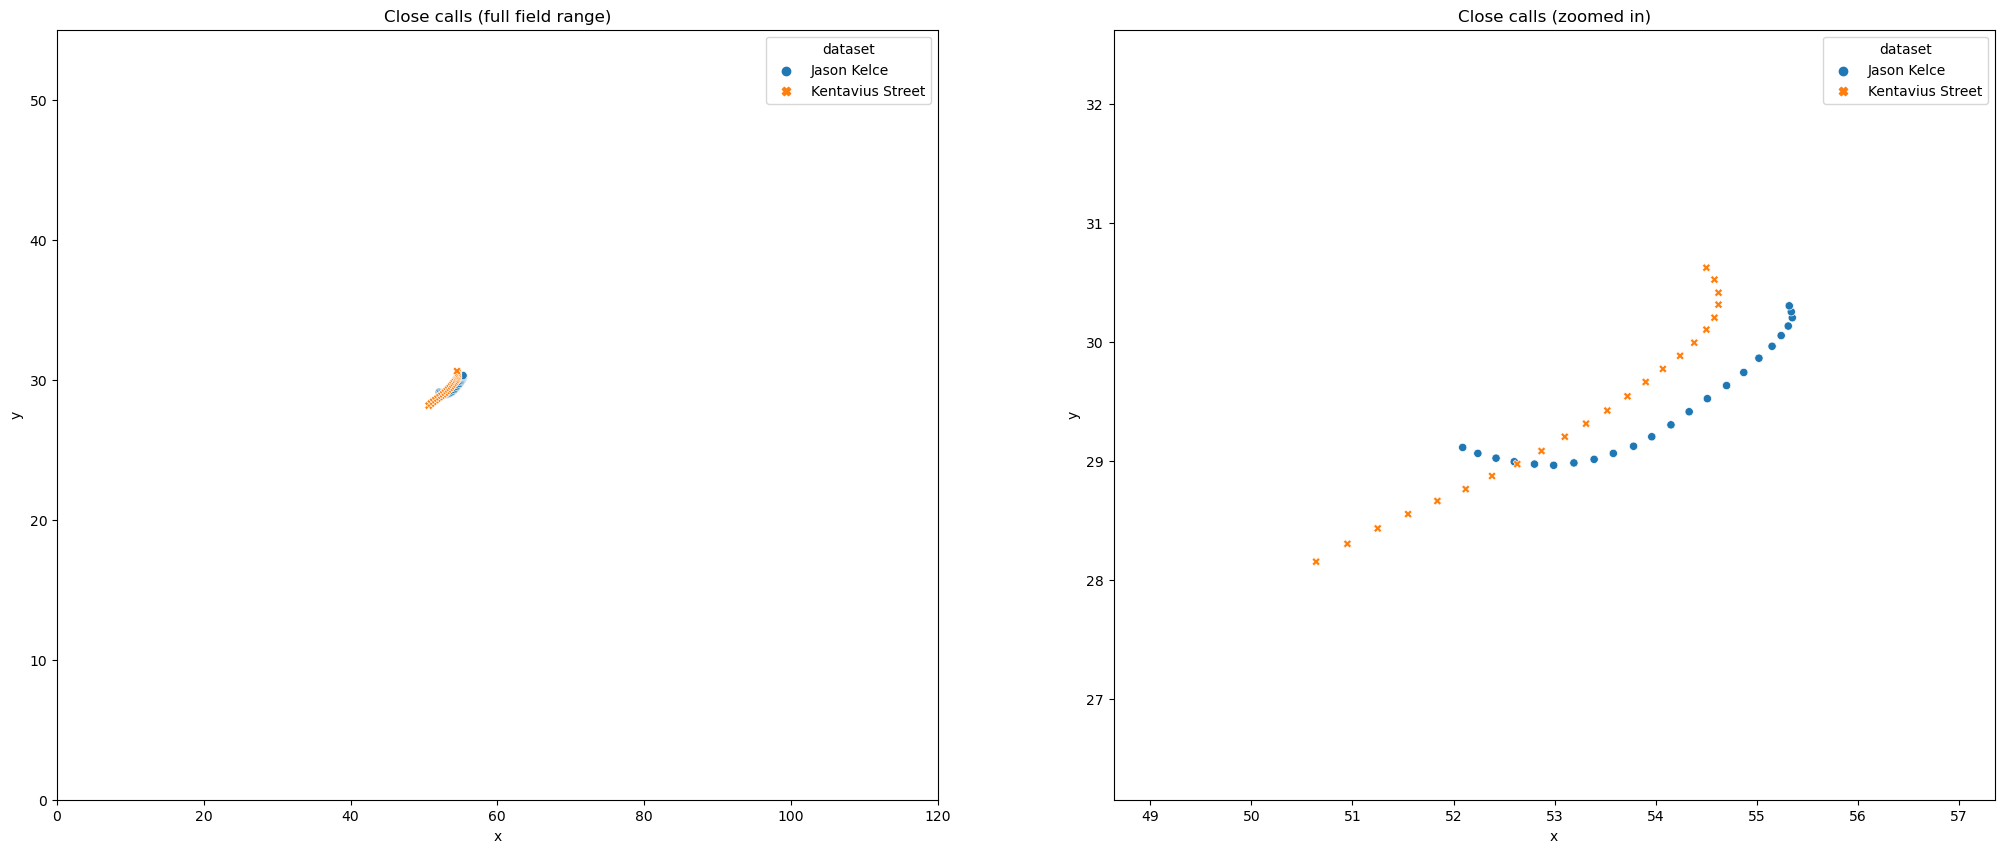

Event recorded?
[]


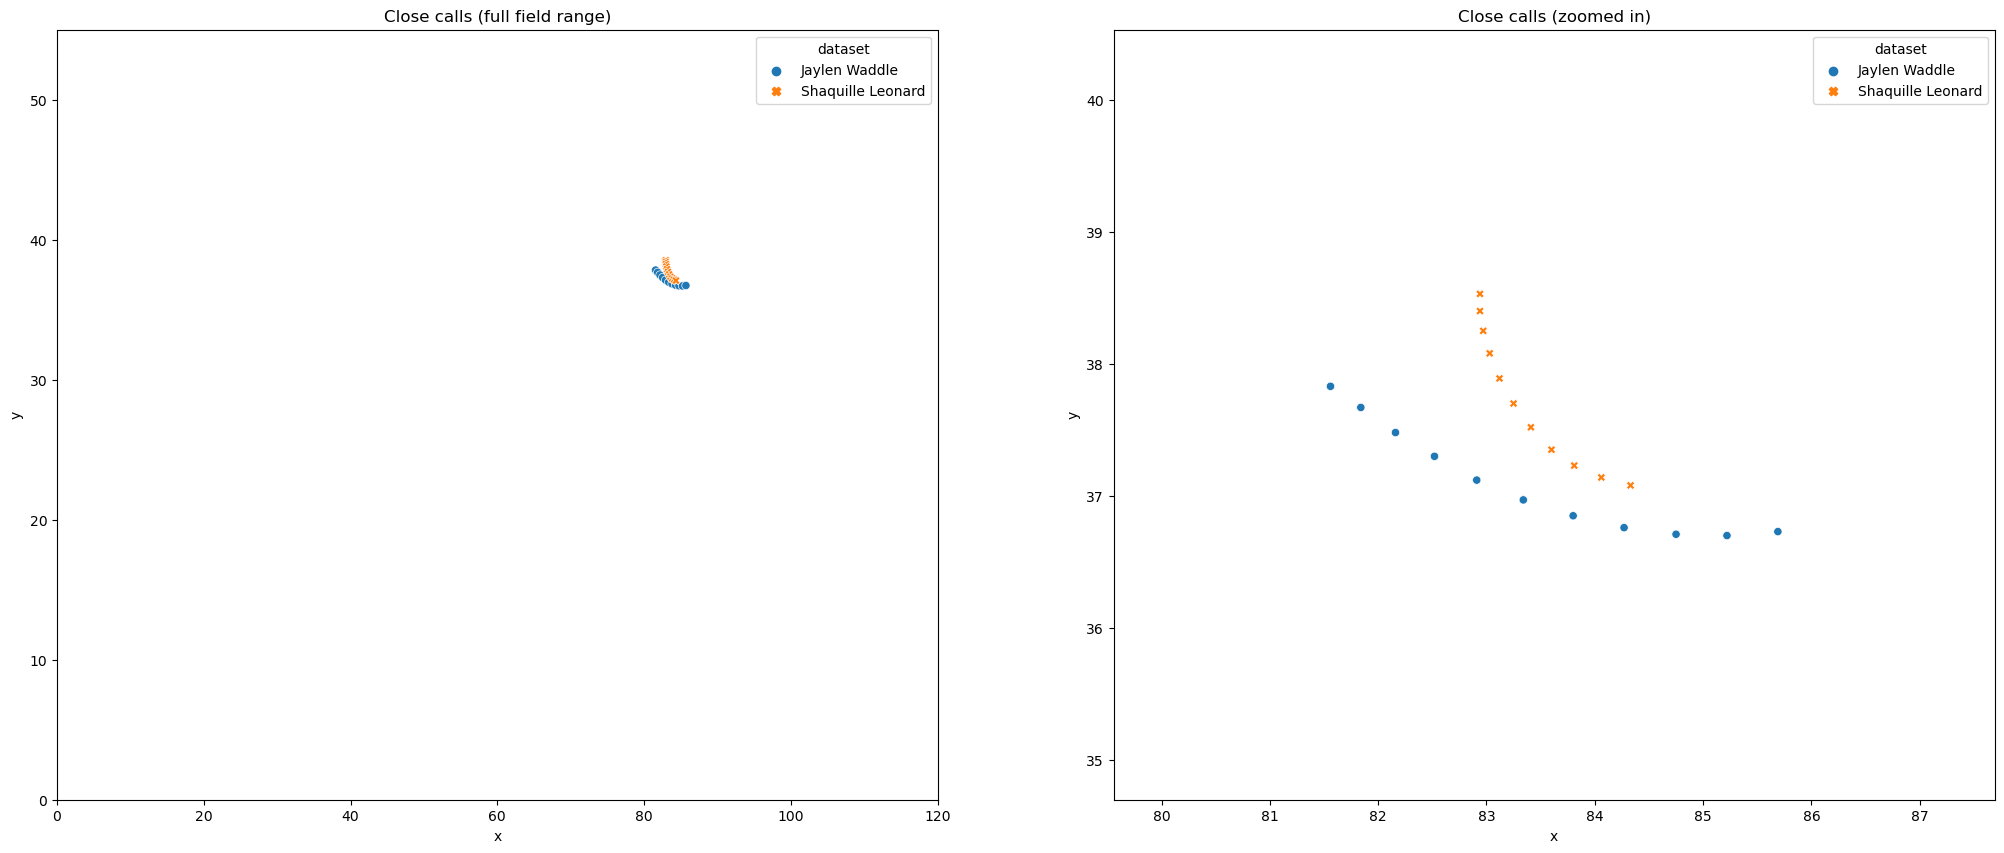

Event recorded?
[]


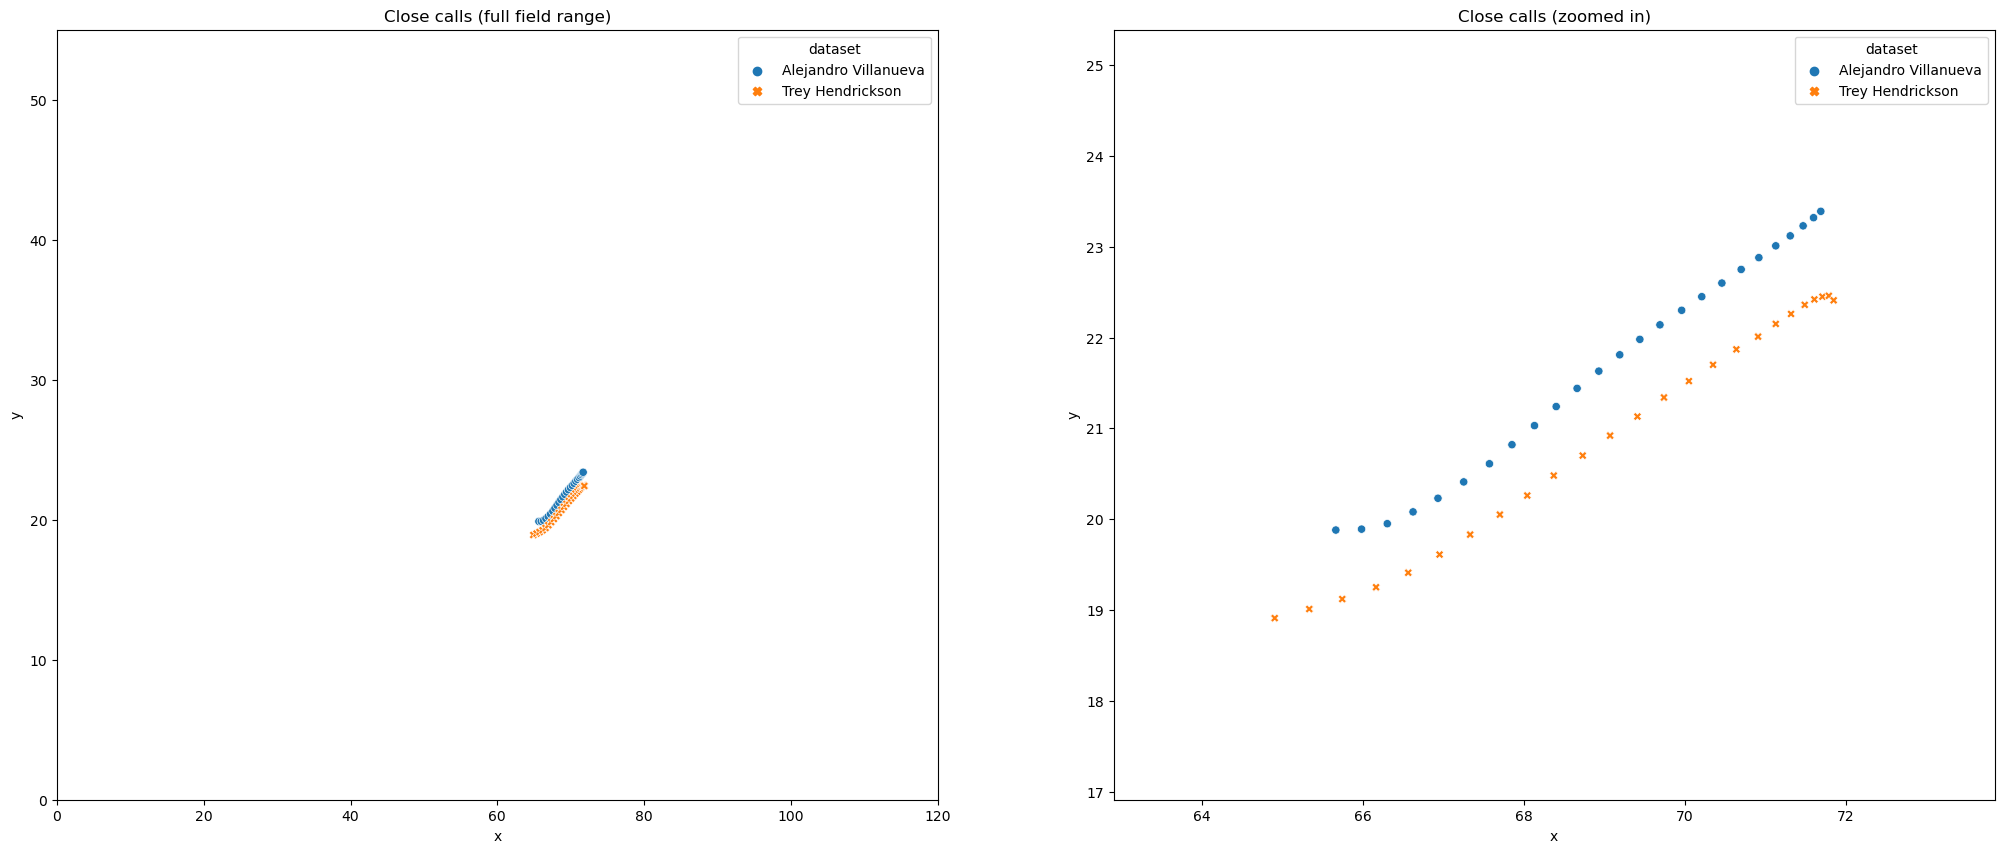

Event recorded?
[]


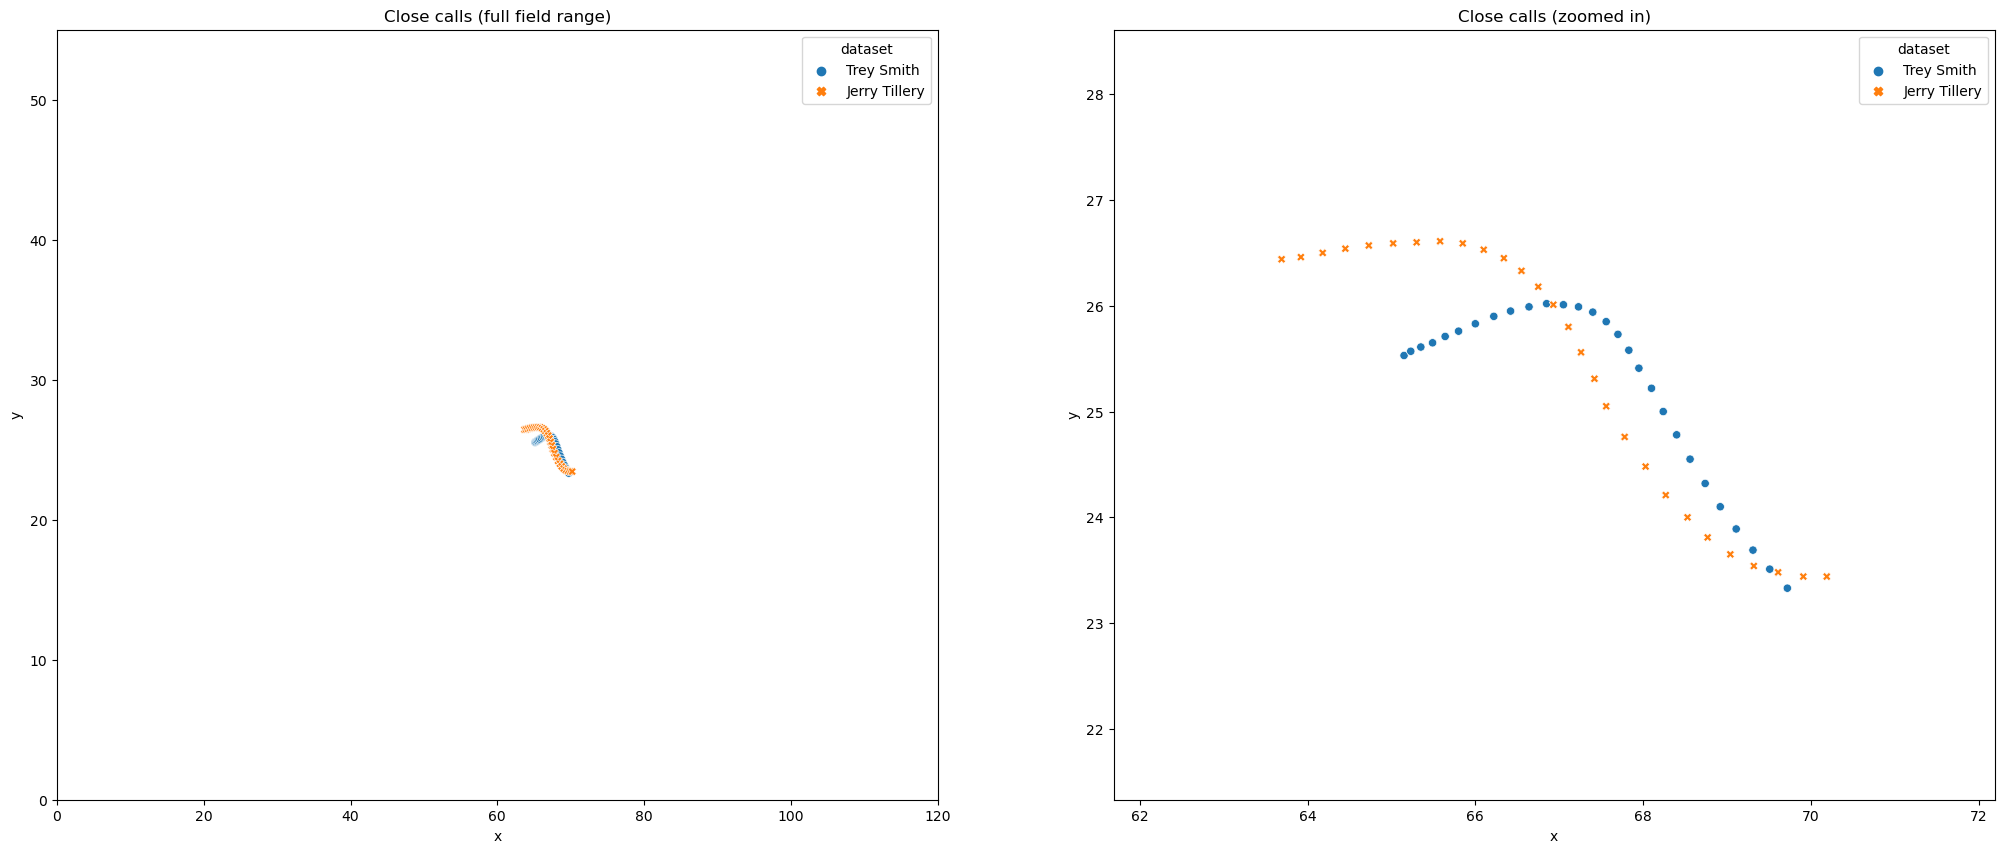

Event recorded?
[]


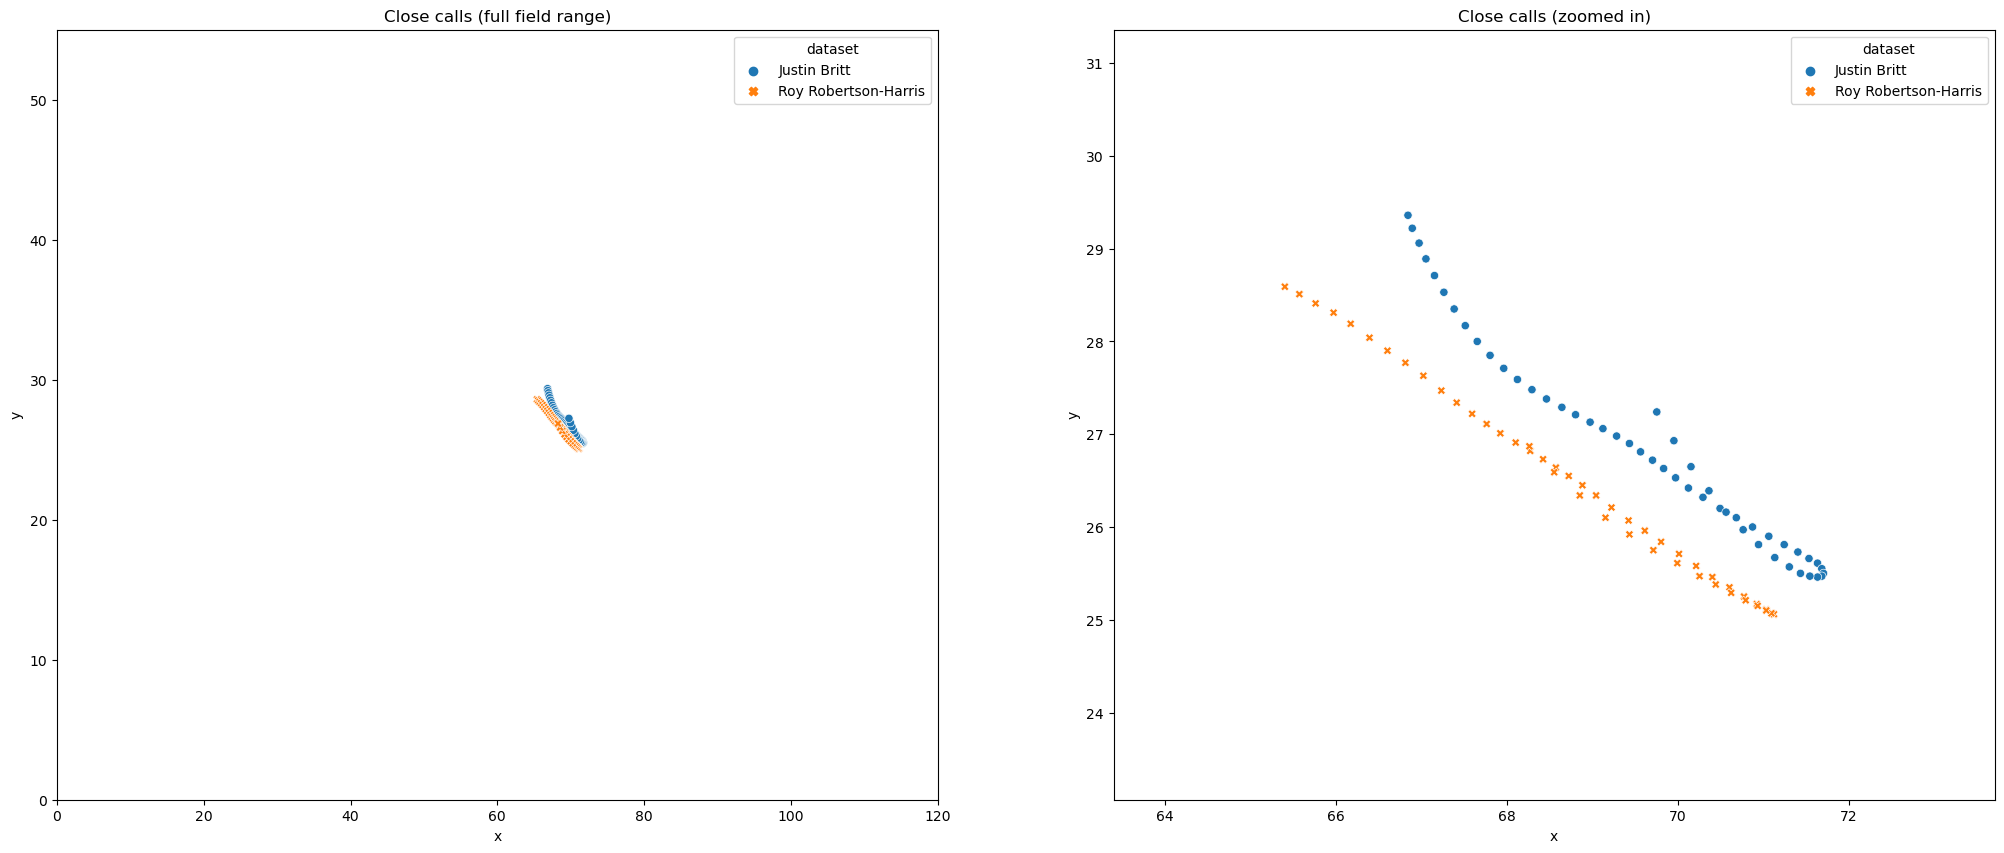

In [20]:
for rand_int in np.random.randint(0, close_df.shape[0], 5):
    
    playId = close_df.iloc[rand_int].playId
    nflId_home_team = close_df.iloc[rand_int].nflId_home_team
    nflId_visitor_team = close_df.iloc[rand_int].nflId_visitor_team
    gameId = close_df.iloc[rand_int].gameId

    home_team_player = players[players.nflId==nflId_home_team]['displayName'].values[0]
    visitor_team_player = players[players.nflId==nflId_visitor_team]['displayName'].values[0]
    
    mask = (close_df.playId==playId) & (close_df.gameId==gameId) & (close_df.nflId_home_team==nflId_home_team)

    mask_2 = (close_df.event_home_team=='None') & (close_df.event_visitor_team!='None')
    
    
    print(f"Event recorded?\n{close_df.loc[mask_2,['event_home_team', 'event_visitor_team']].values}")
    
    home_team_data = close_df[mask][['x_home_team', 'y_home_team']].rename({'x_home_team':'x', 'y_home_team':'y'}, axis=1).reset_index(drop=True)
    visitor_team_data = close_df[mask][['x_visitor_team', 'y_visitor_team']].rename({'x_visitor_team':'x', 'y_visitor_team':'y'}, axis=1).reset_index(drop=True)


    concatenated = pd.concat([home_team_data.assign(dataset=home_team_player), visitor_team_data.assign(dataset=visitor_team_player)])
    
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,10))

    ax1 = sns.scatterplot(x='x', y='y', data=concatenated,
                    hue='dataset', style='dataset', ax=ax1)
    
    ax2 = sns.scatterplot(x='x', y='y', data=concatenated,
                    hue='dataset', style='dataset', ax=ax2)
    
    ax1.set_title('Close calls (full field range)')
    ax1.set_xlim([0,120])
    ax1.set_ylim([0,55])
        
    ax2.set_title('Close calls (zoomed in)')
    ax2.set_xlim([concatenated.x.min()-2,concatenated.max().x+2])
    ax2.set_ylim([concatenated.y.min()-2,concatenated.max().y+2])

    plt.show()